In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Cálculo Numérico - EP 1

## Funções

In [12]:
def root_with_bissection_method(function, x1, x2, error_acceptance, save_data=False, data_name='bm_data'):
    import pandas as pd
    import numpy as np
    
    def f(x):
        f = eval(function)
        return f
    
    data = {'x_1':[], 'x_2':[], 'x_m': [], 'f(x_2)': [], 'f(x_m)': [], 'e_n': []}
    
    while np.abs(x1 - x2) > error_acceptance:
        xm = (x1 + x2) / 2
        data['x_1'].append(round(x1, 4))
        data['x_2'].append(round(x2, 4))
        data['x_m'].append(round(xm, 4))
        data['f(x_2)'].append(round(f(x2), 4))
        data['f(x_m)'].append(round(f(xm), 4))
        data['e_n'].append(round(np.abs(x1 - x2), 4))

        if f(xm) / f(x1) > 0:
            x1 = xm
        else:
            x2 = xm

    xm = (x1 + x2) / 2
    data['x_1'].append(round(x1, 4))
    data['x_2'].append(round(x2, 4))
    data['x_m'].append(round(xm, 4))
    data['f(x_2)'].append(round(f(x2), 4))
    data['f(x_m)'].append(round(f(xm), 4))
    data['e_n'].append(round(np.abs(x1 - x2), 4))

    df = pd.DataFrame(data=data)
    if save_data:
        df.to_csv(f'{data_name}.csv', index=False)

    return xm, df


def root_with_NR(function, dvfunction, x0, error_acceptance, iterations, save_data=False, data_name='nr_data'):
    import pandas as pd
    import numpy as np
    
    def f(x):
        f = eval(function)
        return f
    
    def dvf(x):
        dvf = eval(dvfunction)
        return dvf
    
    data = {'x_n': [], 'f(x_n)': [], 'f\'(x_n)': [], 'e_n': []}

    xn = x0
    for i in range(iterations):
        a = xn - f(xn) / dvf(xn)
        
        data['x_n'].append(round(xn, 4))
        data['f(x_n)'].append(round(f(xn), 4))
        data['f\'(x_n)'].append(round(dvf(xn), 4))
        data['e_n'].append(round(np.abs(a - xn) / np.abs(xn), 4))

        if np.abs(a - xn) / np.abs(xn) <= error_acceptance:
            break
        
        xn = a
        
    df = pd.DataFrame(data=data)
    if save_data:
        df.to_csv(f'{data_name}.csv', index=False)
        
    return a, df


def root_with_secant(function, x0, x1, error_acceptance, iterations, save_data=False, data_name='sec_data'):
    import pandas as pd
    import numpy as np
    
    def f(x):
        return eval(function)
    
    data = {'x_n-1': [], 'x_n': [], 'f(x_n)': [], 'f(x_n-1)': [], 'e_n': []}

    xn_minus_1 = x0
    xn = x1
    
    for i in range(iterations):
        fxn = f(xn)
        fxn_minus_1 = f(xn_minus_1)
        
        a = xn - fxn * (xn - xn_minus_1) / (fxn - fxn_minus_1)
        
        data['x_n-1'].append(round(xn_minus_1, 4))
        data['x_n'].append(round(xn, 4))
        data['f(x_n)'].append(round(fxn, 4))
        data['f(x_n-1)'].append(round(fxn_minus_1, 4))
        data['e_n'].append(round(np.abs(a - xn) / np.abs(xn), 4))
        
        if np.abs(a - xn) / np.abs(xn) <= error_acceptance:
            break
        
        xn_minus_1 = xn
        xn = a
    
    df = pd.DataFrame(data=data)
    if save_data:
        df.to_csv(f'{data_name}.csv', index=False)
    
    return a, df


## Item a)

In [13]:
bm_root, bm_data = root_with_bissection_method('x**(3/4)-np.cos(x**2)', -1, 1, 1e-4, save_data=True)
print('x =', np.float32(bm_root))

x = 0.77438354


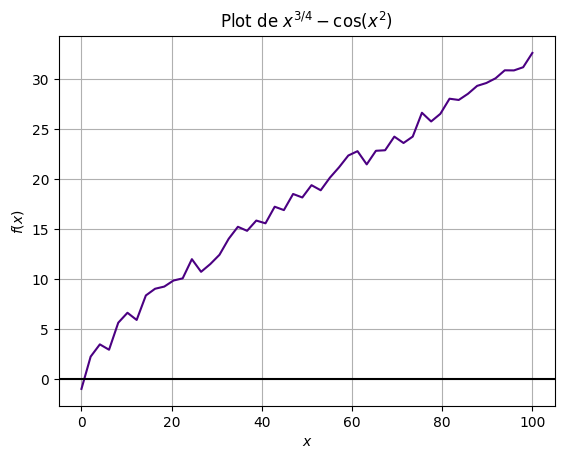

In [22]:
x = np.linspace(0, 100)

plt.plot(x, x**(3/4)-np.cos(x**2), c='indigo')
plt.axhline(0, c='black')
plt.title(r'Plot de $x^{3/4}-\cos(x^2)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
#plt.savefig('a.png', dpi=240)
plt.show()

## Item b)

In [15]:
nr_root, nr_data = root_with_NR('x**(3/4)-np.cos(x**2)', '(3/4)*x**(-1/4)+2*x*np.sin(x**2)', 0.5, 1e-4, 20, save_data=True)
print('x =', np.float32(nr_root))

x = 0.77439666


## Item c)

In [16]:
# Config
V_0 = 1.38e3 #eV
r_0 = 0.328 #A
r = np.linspace(0.01,2.5,100)

def V(r):
    V = -14.4/r + V_0*np.exp(-r/r_0)
    return V

def F(r):
    F = -14.4/r**2 + (V_0/r_0)*np.exp(-r/r_0)
    return F

### i)

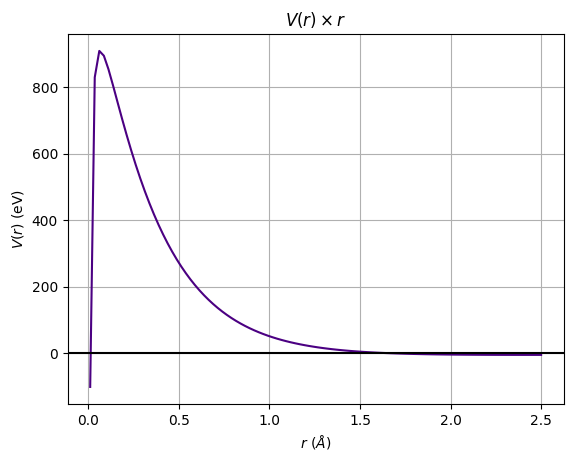

In [17]:
# V(r) x r
plt.plot(r, V(r), c='indigo')
plt.axhline(0, c='black')
plt.title(r'$V(r) \times r$')
plt.xlabel(r'$r$ ($\AA$)')
plt.ylabel(r'$V(r)$ (eV)')
plt.grid()
#plt.savefig('c1.png', dpi=240)
plt.show()

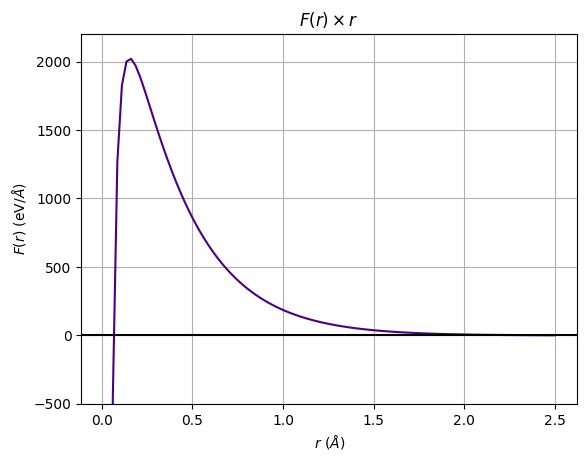

In [18]:
# F(r) x r
plt.plot(r, F(r), c='indigo')
plt.axhline(0, c='black')
plt.title(r'$F(r) \times r$')
plt.xlabel(r'$r$ ($\AA$)')
plt.ylabel(r'$F(r)$ (eV/$\AA$)')
plt.ylim(-5*1e2, 2.2*1e3)
plt.grid()
#plt.savefig('c2.png', dpi=240)
plt.show()

### ii)

In [19]:
sec_root, sec_data = root_with_secant('-14.4/x**2 + (V_0/r_0)*np.exp(-x/r_0)', 2.3, 2.7, 1e-4, 30, save_data=True)
print('x =', np.float32(sec_root), '(Método da Secante)')

x = 2.4500072 (Método da Secante)


In [20]:
F(2.4500072)

5.3932765364805846e-08